### Colab criado para trabalho de mecânica

* INTEGRANTES:
 * Lucas Henrique
 * Marco Antonio
 * Pedro Henrique
 * Yves Sena


* Libs utilizadas:
 * matplotlib
 * numpy
 * pandas

<br>

## **Resumo do projeto:**

 Este projeto consiste na modelagem, análise e visualização do comportamento estrutural de uma treliça plana 2D submetida a diferentes casos de carregamento. A treliça é composta por 14 nós e 25 barras, com ligações nos nós que permitem apenas forças axiais (compressão ou tração), conforme os princípios da teoria das estruturas.
 <br>A análise foi feita utilizando o método da rigidez (ou dos deslocamentos), implementado em *Python* com as bibliotecas *NumPy* e *Matplotlib*, utilizamos *Pandas* para colocar os dados em tabela. A matriz de rigidez global da estrutura é montada com base nas propriedades dos materiais (módulo de elasticidade e área da seção transversal) e nas coordenadas dos nós.

Três *casos* distintos de carregamento foram simulados:

Caso A: Forças *horizontais* de 10 kN aplicadas nos nós 13 e 14.

Caso B: Forças *verticais* de 10 kN aplicadas nos nós 13 e 14.

Caso C: Força de *10 kN aplicada no nó 13* e *-10 kN no nó 14* (trabalho em oposição).


A estrutura foi considerada engastada nos nós 0 e 1, impedindo qualquer deslocamento nesses pontos. O deslocamento dos nós foi calculado e, para visualização, amplificado com um fator para destacar as deformações. Cada caso foi plotado separadamente com os nós numerados para facilitar a identificação e interpretação dos resultados.



##**Estrutura do projeto**

## Código plotando a treliça a ser analisada:

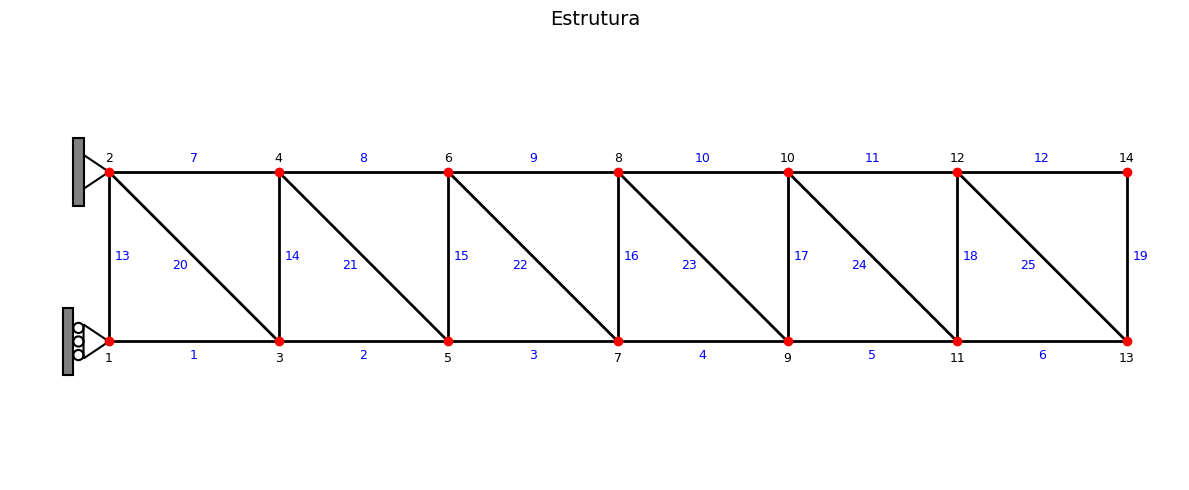

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Coordenadas dos n?s
nodes = {
    1: (0, 0),  2: (0, 1),
    3: (1, 0),  4: (1, 1),
    5: (2, 0),  6: (2, 1),
    7: (3, 0),  8: (3, 1),
    9: (4, 0), 10: (4, 1),
    11: (5, 0), 12: (5, 1),
    13: (6, 0), 14: (6, 1)
}

# Conexões das barras
bars = [
    (1, 3), (3, 5), (5, 7), (7, 9), (9, 11), (11, 13),
    (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14),
    (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12), (13, 14),
    (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13)
]

def desenhar_vinculos():
    ax = plt.gca()

    # Nó 1: Engaste (fixo)
    x2, y2 = nodes[2]
    tri_base_x = x2 - 0.15
    ponta = (x2, y2)
    base_sup = (tri_base_x, y2 + 0.1)
    base_inf = (tri_base_x, y2 - 0.1)

    # Triângulo fechado
    engaste = patches.Polygon([base_inf, base_sup, ponta], closed=True,
                              edgecolor='k', facecolor='white', linewidth=1.5)
    ax.add_patch(engaste)

    # Parede com espessura visível e aresta direita destacada
    parede1 = patches.FancyBboxPatch((tri_base_x - 0.06, y2 - 0.2), 0.06, 0.4,
                                     boxstyle="square,pad=0",
                                     linewidth=1.5, edgecolor='k', facecolor='gray')
    ax.add_patch(parede1)

    # Nó 0: Apoio móvel
    x1, y1 = nodes[1]
    tri_base_x = x1 - 0.15
    ponta = (x1, y1)
    base_sup = (tri_base_x, y1 + 0.1)
    base_inf = (tri_base_x, y1 - 0.1)

    apoio = patches.Polygon([base_inf, base_sup, ponta], closed=True,
                            edgecolor='k', facecolor='white', linewidth=1.5)
    ax.add_patch(apoio)

    # Desenhando os nós
    raio = 0.03
    circle_x = tri_base_x - raio
    circle_y = [y1 - 0.08, y1, y1 + 0.08]
    for cy in circle_y:
        circle = plt.Circle((circle_x, cy), raio, color='k', fill=False, lw=1.5)
        ax.add_patch(circle)

    # Parede inferior
    parede_width = 0.06
    parede_x = circle_x - raio - parede_width
    parede2 = patches.FancyBboxPatch((parede_x, y1 - 0.2), parede_width, 0.4,
                                     boxstyle="square,pad=0",
                                     linewidth=1.5, edgecolor='k', facecolor='gray')
    ax.add_patch(parede2)

# Plotagem
plt.figure(figsize=(12, 5))

# Desenhar barras e legendas
for idx, (n1, n2) in enumerate(bars, start=1):
    x1, y1 = nodes[n1]
    x2, y2 = nodes[n2]
    x_mid = (x1 + x2) / 2
    y_mid = (y1 + y2) / 2
    plt.plot([x1, x2], [y1, y2], 'k-', lw=2)

    # Posição da legenda
    if y1 == y2:
        dx, dy = (0, -0.08) if y1 == 0 else (0, 0.08)
    elif x1 == x2:
        dx, dy = (0.08, 0)
    else:
        dx, dy = (-0.08, -0.05)

    plt.text(x_mid + dx, y_mid + dy, str(idx), color='blue', fontsize=9,
             ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', pad=0.5))

# Desenhando os nós
for node, (x, y) in nodes.items():
    plt.plot(x, y, 'ro')
    if y == 1:
        plt.text(x, y + 0.08, str(node), fontsize=9, ha='center', va='center')
    else:
        plt.text(x, y - 0.10, str(node), fontsize=9, ha='center', va='center')

# Vínculos
desenhar_vinculos()

plt.axis('equal')
plt.axis('off')
plt.title("Estrutura", fontsize=14)
plt.tight_layout()
plt.show()

## Tabela de Forças internas e Resultados finais

,Barra,Força (N)
0,B1,1.00e+04
1,B2,1.00e+04
2,B3,1.00e+04
3,B4,1.00e+04
4,B5,1.00e+04
5,B6,1.00e+04
6,B7,1.00e+04
7,B8,1.00e+04
8,B9,1.00e+04
9,B10,1.00e+04


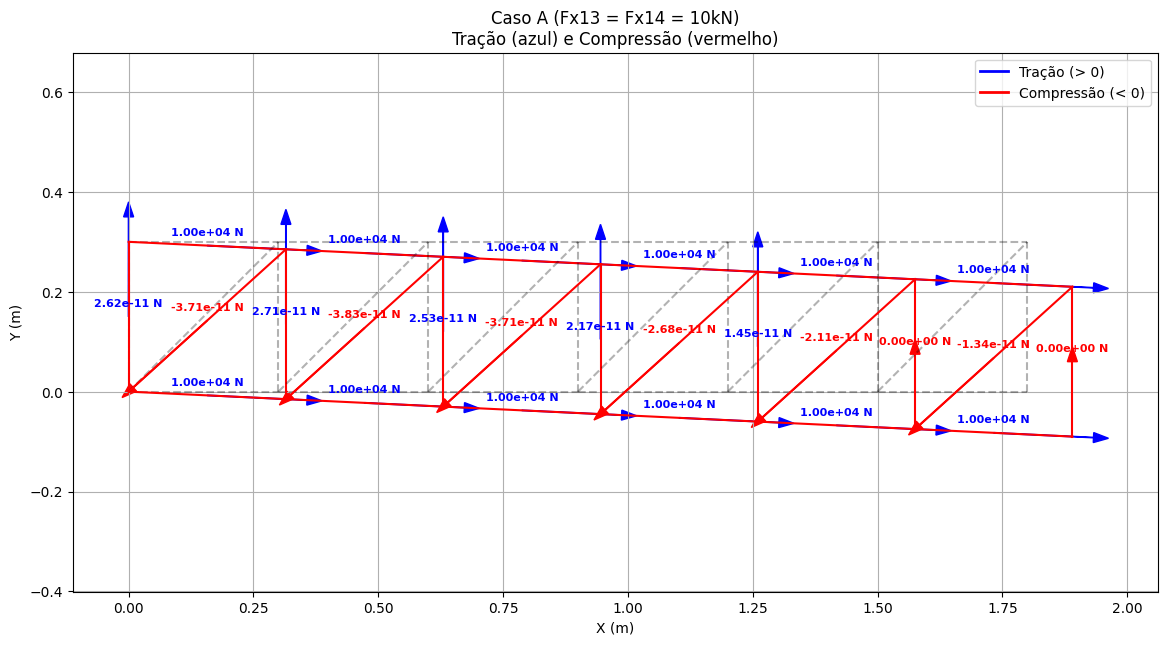

,Barra,Força (N)
0,B1,100000.00
1,B2,80000.00
2,B3,60000.00
3,B4,40000.00
4,B5,20000.00
5,B6,0.00
6,B7,-120000.00
7,B8,-100000.00
8,B9,-80000.00
9,B10,-60000.00


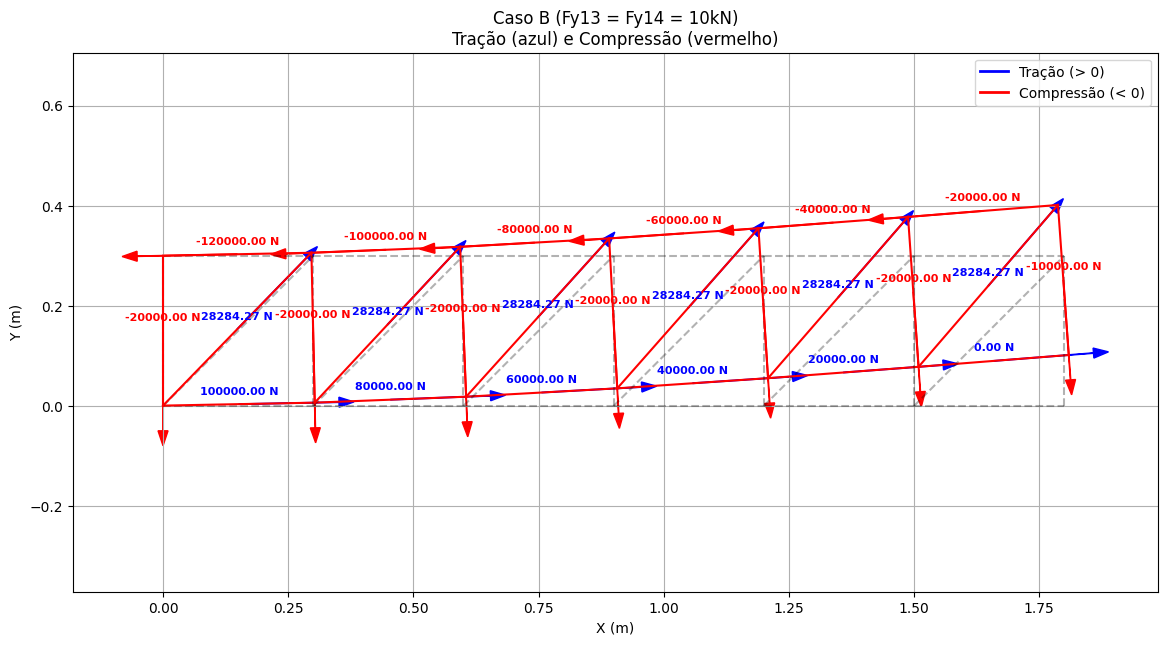

,Barra,Força (N)
0,B1,1.00e+04
1,B2,1.00e+04
2,B3,1.00e+04
3,B4,1.00e+04
4,B5,1.00e+04
5,B6,1.00e+04
6,B7,-1.00e+04
7,B8,-1.00e+04
8,B9,-1.00e+04
9,B10,-1.00e+04


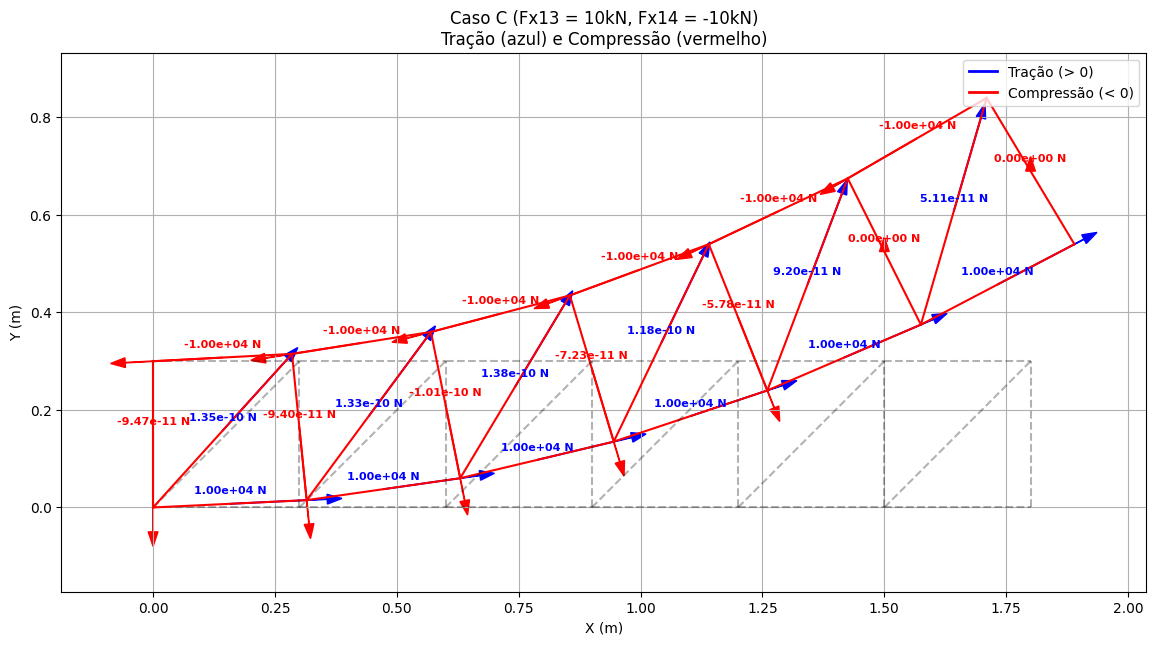

,Propriedade,Valor,Unidade
0,EA equivalente,1.000e+07,N
1,EI equivalente,4.500e+05,N·m²
2,GA equivalente,3.086e+05,N


Método,Valor,Unidade
MEF,2.100e-03,m
Teórico,2.400e-03,m
Diferença,1.250e+01,%


Método,Valor,Unidade
MEF,1.545e-01,m
Teórico,1.802e-01,m
Diferença,1.423e+01,%


Método,Valor,Unidade
MEF,1.470e-02,m
Teórico,1.920e-02,m
Diferença,2.344e+01,%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Propriedades do material
E = 100e9  # Em pascal (Pa)
A = 1e-4   # Área da seção transversal (m²)
L = 0.3    # Comprimento (m)


# Mapeando os nós
nos = np.array([
    [0, 0], [0, L], [L, 0], [L, L], [2*L, 0], [2*L, L],
    [3*L, 0], [3*L, L], [4*L, 0], [4*L, L], [5*L, 0], [5*L, L],
    [6*L, 0], [6*L, L]
])



# Conexão dos elementos
elementos = [
    (0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12),
    (1, 3), (3, 5), (5, 7), (7, 9), (9, 11), (11, 13),
    (0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13),
    (0, 3), (2, 5), (4, 7), (6, 9), (8, 11), (10, 13)
]


# Comprimento equivalente da viga
l_eq = 6 * L  # 1.8 m


# Casos a serem analisados:
casos = {
    "Caso A (Fx13 = Fx14 = 10kN)": {
        2*12: 10e3,
        2*13: 10e3
    },
    "Caso B (Fy13 = Fy14 = 10kN)": {
        2*12+1: 10e3,
        2*13+1: 10e3
    },
    "Caso C (Fx13 = 10kN, Fx14 = -10kN)": {
        2*12: 10e3,
        2*13: -10e3
    }
}


# Formatando a exibição do pandas
pd.set_option('display.float_format', '{:.10e}'.format)


# ===============================
# FUNÇÕES DE ANÁLISE DA TRELIÇA
# ===============================


# Calculo da matriz de rigidez de uma barra (2d)
def matriz_rigidez_barra(no_i, no_j, E, A, nos=nos):
    # Coordenadas dos nós
    xi, yi = nos[no_i]
    xj, yj = nos[no_j]
    dx, dy = xj - xi, yj - yi
    # Comprimento da barra
    L_barra = np.sqrt(dx**2 + dy**2)
    # Cálculo dos cossenos e senos
    c, s = dx / L_barra, dy / L_barra
    k = (E * A / L_barra) * np.array([
        [ c*c,  c*s, -c*c, -c*s],
        [ c*s,  s*s, -c*s, -s*s],
        [-c*c, -c*s,  c*c,  c*s],
        [-c*s, -s*s,  c*s,  s*s]
    ])
    return k


# Montar a matriz global a partir das matrizes locais
def montar_matriz_rigidez_global(nos=nos, elementos=elementos):
    # Número de nos
    n_nos = len(nos)
    # Grau de liberdade (2: x e y)
    gl = 2 * n_nos
    K = np.zeros((gl, gl))
    for i, j in elementos:
        ke = matriz_rigidez_barra(i, j, E, A, nos)
        indices = [2*i, 2*i+1, 2*j, 2*j+1]
        # Soma da matriz do elemento na matriz global
        for a in range(4):
            for b in range(4):
                K[indices[a], indices[b]] += ke[a, b]
    return K


def resolver_sistema(K, forcas):
    # Condições de contorno
    gl_fixos = [0, 2, 3]  # Restrições: Nó 0 em X; Nó 1 em X e Y
    gl = K.shape[0]
    gl_livres = [i for i in range(gl) if i not in gl_fixos]

    F = np.zeros(gl)
    for gl_forca, valor in forcas.items():
        F[gl_forca] = valor

    # Redução do sistema
    K_red = K[np.ix_(gl_livres, gl_livres)]
    F_red = F[gl_livres]
    U_red = np.linalg.solve(K_red, F_red)

    U = np.zeros(gl)
    U[gl_livres] = U_red
    return U


# Cálculo das forças axiais nas barras
def calcular_forcas_internas(U, nos=nos, elementos=elementos):
    forcas_internas = []
    for idx, (i, j) in enumerate(elementos):
        xi, yi = nos[i]
        xj, yj = nos[j]

        # Vetor da barra
        dx = xj - xi
        dy = yj - yi
        L_barra = np.sqrt(dx**2 + dy**2)
        c, s = dx / L_barra, dy / L_barra

        # Deslocamento dos nós
        u_i, u_j = U[2*i], U[2*j] # Horizontal
        v_i, v_j = U[2*i+1], U[2*j+1] # Vertical
        delta_L = (u_j - u_i)*c + (v_j - v_i)*s
        # Força axial
        N = (E * A / L_barra) * delta_L

        forcas_internas.append([f'B{idx+1}', N])

    return pd.DataFrame(forcas_internas, columns=['Barra', 'Força (N)'])


# Recebe o vetor de deslocamento como parâmetro
def plotar_trelica(U, df_forcas, caso_nome, amplificacao=50, nos=nos, elementos=elementos):

    # Definindo o tamanho padrão da figura
    plt.figure(figsize=(14, 7))

    # Loop para plotar cada elemento
    for idx, (i, j) in enumerate(elementos):
        xi, yi = nos[i]
        xj, yj = nos[j]

        # Plotando a treliça original
        plt.plot([xi, xj], [yi, yj], 'k--', alpha=0.3)

        # Calcula a nova posição do nó deformado usando os deslocamentos
        xi_def = xi + U[2*i] * amplificacao
        yi_def = yi + U[2*i+1] * amplificacao
        xj_def = xj + U[2*j] * amplificacao
        yj_def = yj + U[2*j+1] * amplificacao
        plt.plot([xi_def, xj_def], [yi_def, yj_def], 'r-', lw=1.5)

        # Forças internas
        N = df_forcas.iloc[idx, 1]
        # Azul = tração, vermelho = compressão
        cor = 'blue' if N > 0 else 'red'
        meio_x = (xi_def + xj_def)/2
        meio_y = (yi_def + yj_def)/2

        # Desenhando as direções das forças internas
        dx = xj_def - xi_def
        dy = yj_def - yi_def
        L_def = np.sqrt(dx**2 + dy**2)


        # Seta indicando a força interna
        plt.arrow(meio_x, meio_y,
        dx/L_def * 0.2 * np.sign(N),
        dy/L_def * 0.2 * np.sign(N),
        color=cor, head_width=0.02)

        if "Caso B" in caso_nome:
            texto = f'{N:.2f} N'  # Notação normal
        else:
            texto = f'{N:.2e} N'  # Notação científica

        plt.text(meio_x, meio_y + 0.02, texto,
                 color=cor, ha='center', fontsize=8, fontweight='bold')

    plt.title(f'{caso_nome}\nTração (azul) e Compressão (vermelho)')
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.axis('equal')
    plt.grid(True)
    plt.legend(handles=[
        Line2D([0], [0], color='blue', lw=2, label='Tração (> 0)'),
        Line2D([0], [0], color='red', lw=2, label='Compressão (< 0)')
    ], loc='upper right')
    plt.show()




# Função para plotar uma tabela comparativa
def formatar_comparacao(titulo, valor_mef, valor_teorico, unidade="m"):

    """Formata a comparação no mesmo estilo das tabelas de forças internas"""
    diferenca = abs((valor_mef - valor_teorico)/valor_teorico)*100

    # Criar um DataFrame estilizado para a comparação
    df_comparacao = pd.DataFrame({
        'Método': ['MEF', 'Teórico', 'Diferença'],
        'Valor': [valor_mef, valor_teorico, diferenca],
        'Unidade': [unidade, unidade, '%']
    })

    # Função de formatação de acordo com a diferença
    def color_diff(val):
        color = '#ff6969' if val > 5 else 'skyblue'  # Destaca diferenças > 5%
        return f'color: {color}; font-weight: bold'

    # Estilização
    styled = (df_comparacao.style
             .format({'Valor': '{:.3e}', 'Unidade': '{}'}, precision=3)
             .map(color_diff, subset=pd.IndexSlice[:, ['Valor']])
             .set_caption(titulo)
             .set_properties(**{'text-align': 'center'})
             .hide(axis='index'))

    display(styled)



def calcular_propriedades_equivalentes(resultados):

    U_A = resultados["Caso A (Fx13 = Fx14 = 10kN)"]
    u_medio_A = (U_A[2*12] + U_A[2*13]) / 2
    EA_eq = (10e3 * l_eq) / u_medio_A

    U_C = resultados["Caso C (Fx13 = 10kN, Fx14 = -10kN)"]
    v_medio_C = (U_C[2*12+1] + U_C[2*13+1]) / 2
    momento = 10e3 * L
    EI_eq = (momento * l_eq**2) / (2 * v_medio_C)

    U_B = resultados["Caso B (Fy13 = Fy14 = 10kN)"]
    v_medio_B = (U_B[2*12+1] + U_B[2*13+1]) / 2
    GA_eq = (10e3 * l_eq) / (v_medio_B - (10e3 * l_eq**3)/(3 * EI_eq))

    # Criar DataFrame com os resultados
    df_propriedades = pd.DataFrame({
        'Propriedade': ['EA equivalente', 'EI equivalente', 'GA equivalente'],
        'Valor': [EA_eq, EI_eq, GA_eq],
        'Unidade': ['N', 'N·m²', 'N']
    })

    # Função de formatação condicional
    def color_prop(val):
        return 'font-weight: black'

    # Estilização
    styled_props = (df_propriedades.style
                   .format({'Valor': '{:.3e}', 'Unidade': '{}'}, precision=3)
                   .map(color_prop)
                   .set_caption("PROPRIEDADES EQUIVALENTES DA TRELIÇA")
                   .set_properties(**{
                       'text-align': 'middle',
                   })
                   .set_table_styles([{
                       'selector': 'caption',
                       'props': [
                           ('font-size', '16px'),
                           ('font-weight', 'black'),
                           ('text-align', 'middle'),
                           ('color', '#0056b3')
                       ]
                   }]))

    display(styled_props)

    return EA_eq, EI_eq, GA_eq



def validar_com_trelica_extendida(resultados, EA_eq, EI_eq, GA_eq):

    # Adicionar 2 painéis extras (totalizando 8 painéis)
    nos_extendidos = np.vstack([nos, [[7*L, 0], [7*L, L], [8*L, 0], [8*L, L]]])
    elementos_extendidos = elementos + [
        (12, 14), (14, 16), (13, 15), (15, 17),
        (12, 13), (14, 15), (16, 17),
        (12, 15), (14, 17)
    ]

    l_extendido = 8 * L  # 2.4 m

    # Casos de carregamento na treliça estendida
    casos_extendidos = {
        "Caso A Extendido (Fx16 = Fx17 = 10kN)": {2*14: 10e3, 2*15: 10e3},
        "Caso B Extendido (Fy16 = Fy17 = 10kN)": {2*14+1: 10e3, 2*15+1: 10e3},
        "Caso C Extendido (Fx16 = 10kN, Fx17 = -10kN)": {2*14: 10e3, 2*15: -10e3}
    }

    # Simular e comparar
    for nome, forcas in casos_extendidos.items():
        K_ext = montar_matriz_rigidez_global(nos_extendidos, elementos_extendidos)
        U_ext = resolver_sistema(K_ext, forcas)

        # Calcular deflexões médias
        if "A" in nome:
            u_medio = (U_ext[2*14] + U_ext[2*15]) / 2
            u_teorico = (10e3 * l_extendido) / EA_eq
            formatar_comparacao(
                "\n\nComparação de Deflexão Axial (Caso A)",
                u_medio, u_teorico
            )

        elif "B" in nome:
            v_medio = (U_ext[2*14+1] + U_ext[2*15+1]) / 2
            v_teorico = (10e3 * l_extendido**3)/(3 * EI_eq) + (10e3 * l_extendido)/GA_eq
            formatar_comparacao(
                "\n\nComparação de Deflexão Transversal (Caso B)",
                v_medio, v_teorico
            )

        elif "C" in nome:
            v_medio = (U_ext[2*14+1] + U_ext[2*15+1]) / 2
            momento = 10e3 * L
            v_teorico = (momento * l_extendido**2)/(2 * EI_eq)
            formatar_comparacao(
                "\n\nComparação de Deflexão por Momento (Caso C)",
                v_medio, v_teorico
            )



# ========================
# EXECUÇÃO DOS CÁLCULOS
# ========================

resultados = {}

# Processar todos os casos de carregamento
for nome, forcas in casos.items():

    # Cálculos principais
    K = montar_matriz_rigidez_global()
    U = resolver_sistema(K, forcas)
    df_forcas = calcular_forcas_internas(U)

    # Armazena os resultados
    resultados[nome] = U

    # Exibição da tabela estilizada
    pd.set_option('display.max_rows', None)

    def color_forca(val):
        color = '#ff6969' if val < 0 else 'skyblue'
        return f'color: {color}; font-weight: bold'

    if "Caso B" in nome:
        styled_df = (df_forcas.style
                    .map(color_forca, subset=['Força (N)'])
                    .format({'Força (N)': '{:.2f}'})
                    .set_caption(f"Forças Internas - {nome}"))
    else:
        styled_df = (df_forcas.style
                    .map(color_forca, subset=['Força (N)'])
                    .format({'Força (N)': '{:.2e}'})
                    .set_caption(f"Forças Internas - {nome}"))

    display(styled_df.set_properties(**{'text-align': 'center'}))

    # Gera os gráficos
    plotar_trelica(U, df_forcas, nome, amplificacao=50 if "Caso B" not in nome else 1)

# Cálculos finais
EA_eq, EI_eq, GA_eq = calcular_propriedades_equivalentes(resultados)

# Chamar a função de validação com a treliça extendida
validar_com_trelica_extendida(resultados, EA_eq, EI_eq, GA_eq)

## Código para calcular as deflexões nos nós

,Nó,Deflexão X (m),Deflexão Y (m)
0,0,0.00e+00,0.00e+00
1,1,0.00e+00,0.00e+00
2,2,3.00e-04,-3.00e-04
3,3,3.00e-04,-3.00e-04
4,4,6.00e-04,-6.00e-04
5,5,6.00e-04,-6.00e-04
6,6,9.00e-04,-9.00e-04
7,7,9.00e-04,-9.00e-04
8,8,1.20e-03,-1.20e-03
9,9,1.20e-03,-1.20e-03


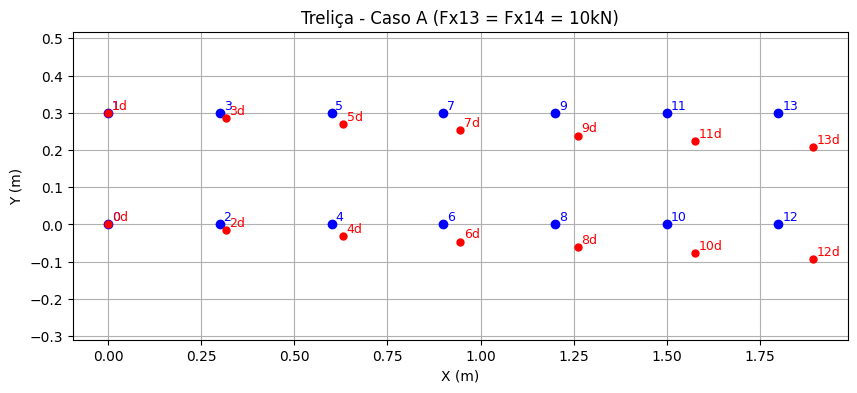

,Nó,Deflexão X (m),Deflexão Y (m)
0,0,0.00e+00,0.00e+00
1,1,0.00e+00,0.00e+00
2,2,3.00e-03,5.90e-03
3,3,-3.60e-03,5.30e-03
4,4,5.40e-03,1.78e-02
5,5,-6.60e-03,1.72e-02
6,6,7.20e-03,3.45e-02
7,7,-9.00e-03,3.39e-02
8,8,8.40e-03,5.48e-02
9,9,-1.08e-02,5.42e-02


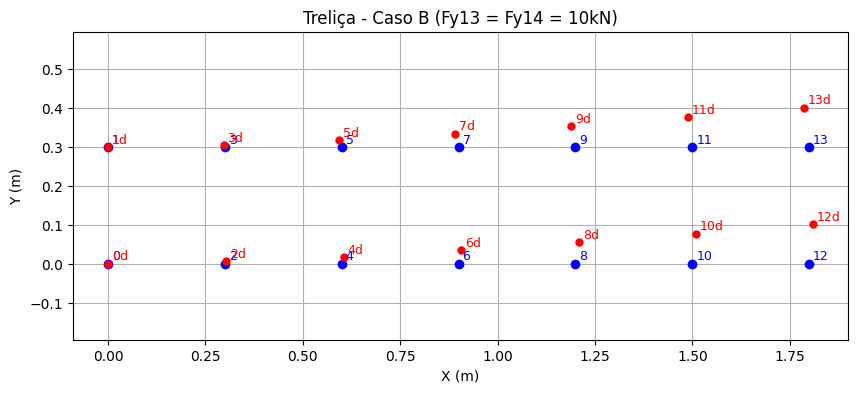

,Nó,Deflexão X (m),Deflexão Y (m)
0,0,0.00e+00,0.00e+00
1,1,0.00e+00,0.00e+00
2,2,3.00e-04,3.00e-04
3,3,-3.00e-04,3.00e-04
4,4,6.00e-04,1.20e-03
5,5,-6.00e-04,1.20e-03
6,6,9.00e-04,2.70e-03
7,7,-9.00e-04,2.70e-03
8,8,1.20e-03,4.80e-03
9,9,-1.20e-03,4.80e-03


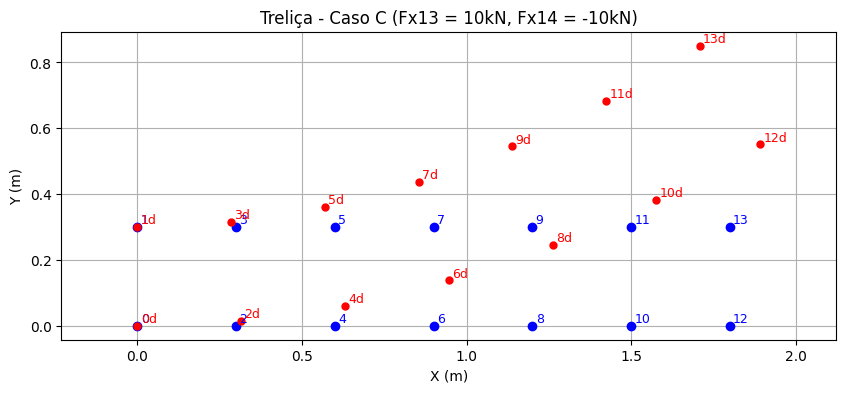

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Parâmetros do material
E = 100e9  # Pa
A = 1e-4   # m²
L = 0.3    # m

# Coordenadas dos nós
nos = np.array([
    [0, 0],   [0, L],
    [L, 0],   [L, L],
    [2*L, 0], [2*L, L],
    [3*L, 0], [3*L, L],
    [4*L, 0], [4*L, L],
    [5*L, 0], [5*L, L],
    [6*L, 0], [6*L, L]
])

# Elementos conectando os nós (usando índices de 0 a 13)
elementos = [
    # Barras horizontais inferiores (de baixo)
    (0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12),

    # Barras horizontais superiores (de cima)
    (1, 3), (3, 5), (5, 7), (7, 9), (9, 11), (11, 13),

    # Barras verticais (baixo para cima)
    (0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13),

    # Diagonais corrigidas (de baixo para cima à direita)
    (0, 3), (2, 5), (4, 7), (6, 9), (8, 11), (10, 13)
]


def matriz_rigidez_barra(nó_i, nó_j, E, A):
    xi, yi = nos[nó_i]
    xj, yj = nos[nó_j]
    dx = xj - xi
    dy = yj - yi
    # Módulo de L
    L = np.sqrt(dx**2 + dy**2)
    c = dx / L
    s = dy / L
    k = (E * A / L) * np.array([
        [c*c, c*s, -c*c, -c*s],
        [c*s, s*s, -c*s, -s*s],
        [-c*c, -c*s, c*c, c*s],
        [-c*s, -s*s, c*s, s*s]
    ])
    return k

def resolver_trelica(caso_nome, forcas):
    n_nos = len(nos)
    gl = 2 * n_nos
    K = np.zeros((gl, gl))

    # Montar a matriz de rigidez global
    for e in elementos:
        i, j = e
        ke = matriz_rigidez_barra(i, j, E, A)
        indices = [2*i, 2*i+1, 2*j, 2*j+1]
        for a in range(4):
            for b in range(4):
                K[indices[a], indices[b]] += ke[a, b]

    # Condições de contorno: nós 0 e 1 são engastados
    nos_fixos = [0, 1]
    gl_fixos = []
    for n in nos_fixos:
        gl_fixos.extend([2*n, 2*n+1])

    # Reduzir K e F
    F = np.zeros(gl)
    for g, valor in forcas.items():
        F[g] = valor

    K_red = np.delete(K, gl_fixos, axis=0)
    K_red = np.delete(K_red, gl_fixos, axis=1)
    F_red = np.delete(F, gl_fixos)

    # Resolver sistema
    U_red = np.linalg.solve(K_red, F_red)
    U = np.zeros(gl)
    U[np.setdiff1d(np.arange(gl), gl_fixos)] = U_red

    # DataFrame para armazenar as forças internas
    colunas = ['Nó', 'Deflexão X (m)', 'Deflexão Y (m)']
    deflexoes_nos = []

    # Cálculo das deflexões nos nós
    for i in range(n_nos):
        deflexao_x = U[2*i]  # Deflexão na direção X
        deflexao_y = U[2*i + 1]  # Deflexão na direção Y
        deflexoes_nos.append([i, deflexao_x, deflexao_y])

   # DataFrame para as deflexões nos nós
    df_deflexoes_nos = pd.DataFrame(deflexoes_nos, columns=colunas)

    # Configuração para exibir em notação científica completa
    pd.set_option('display.float_format', lambda x: '%.15e' % x)
    pd.set_option('display.max_columns', None)

    # Função para destacar valores significativos
    def highlight_significant(val):
        if isinstance(val, (float, np.floating)):
            return 'font-weight: bold' if abs(val) > 1e-10 else ''
        return ''

    # Estilização com notação científica
    styled_deflexoes = (df_deflexoes_nos.style
                       .format({'Deflexão X (m)': '{:.2e}',
                               'Deflexão Y (m)': '{:.2e}'})
                       .map(highlight_significant)
                       .set_properties(**{
                           'text-align': 'center',
                           'font-family': 'monospace',
                           'background-color': '#121212'
                       })
                       .set_table_styles([{
                           'selector': 'caption',
                           'props': [
                               ('font-size', '14px'),
                               ('font-weight', 'bold'),
                               ('color', '#121212')
                           ]
                       }, {
                           'selector': 'th',
                           'props': [
                               ('background-color', '#6a9eff20'),
                               ('color', '#4fc3f7')
                           ]
                       }]))

    display(styled_deflexoes)

    # Plotando a treliça original e deformada apenas nos nós
    amplificacao = 1 if "Caso B" in caso_nome else 51
    plt.figure(figsize=(10, 4))

    # Plotando os nós
    for i, (x, y) in enumerate(nos):
        plt.plot(x, y, 'bo')  # Nós originais (azul)
        plt.text(x + 0.01, y + 0.01, str(i), fontsize=9, color='blue')

    # Plotando os nós deformados
    for i in range(len(nos)):
        dx = U[2*i] * amplificacao
        dy = U[2*i + 1] * amplificacao
        x_def = nos[i][0] + dx
        y_def = nos[i][1] + dy
        plt.plot(x_def, y_def, 'ro', markersize=5)  # Nós deformados (vermelho)
        plt.text(x_def + 0.01, y_def + 0.01, f'{i}d', fontsize=9, color='red')

    # Adicionando título e configurações do gráfico
    plt.title(f'Treliça - {caso_nome}')
    plt.axis('equal')
    plt.grid(True)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')
    plt.show()

    return U


    # Casos de carregamento
casos = {
    "Caso A (Fx13 = Fx14 = 10kN)": {
        2*12: 10e3,  # Fx13
        2*13: 10e3   # Fx14
    },
    "Caso B (Fy13 = Fy14 = 10kN)": {
        2*12+1: 10e3,  # Fy13
        2*13+1: 10e3   # Fy14
    },
    "Caso C (Fx13 = 10kN, Fx14 = -10kN)": {
        2*12: 10e3,    # Fx13
        2*13: -10e3    # Fx14
    }
}

resultados = {}

for nome, forcas in casos.items():
    # Para visualização, escolhemos uma amplificação (use 1 para Caso B se desejar ver os deslocamentos reais)
    amplif = 1 if "Caso B" in nome else 51
    U = resolver_trelica(nome, forcas)
    resultados[nome] = U